# **Homework 1: Pytorch tutorial and image classification**



Objectives:
* Get familiar with PyTorch.
* Understand basic CNN training tips.
* Solve a classification problem with convonlutional neural networks (CNN).

Total points: 100

If any question, please contact the TAs via TA hours, or email.


# **Import Some Packages**

In [1]:
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# **Preliminary Knowledge**

Please read [PyTorch official website](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html) carefully and learn the basic tensor operation before the following tasks.

Also, feel free to try different parameters.

## **Tensor**

### **Create a tensor**

Specify the tensor

In [2]:
x = torch.tensor([[-1,1],[1,-1]])

Zero tensor & Unit tensor

In [3]:
# zero tensor
x = torch.zeros(1,2)
# x = torch.zeros([1,2])
# x = torch.zeros((1,2))

# unit tensor
y = torch.ones(1,2,3)

print(x)

tensor([[0., 0.]])


Random tensor

In [4]:
x = torch.rand(3,4,5,dtype=torch.float32)
print(x)

tensor([[[0.6316, 0.2544, 0.7370, 0.8197, 0.1460],
         [0.0945, 0.7898, 0.4504, 0.5501, 0.8684],
         [0.0720, 0.4600, 0.7687, 0.7893, 0.8458],
         [0.7422, 0.4410, 0.7478, 0.4522, 0.4357]],

        [[0.9230, 0.9102, 0.8077, 0.3219, 0.7780],
         [0.6246, 0.3715, 0.6736, 0.6906, 0.1274],
         [0.9666, 0.5907, 0.9734, 0.2832, 0.9797],
         [0.4498, 0.6379, 0.2096, 0.6076, 0.3965]],

        [[0.9605, 0.3913, 0.5718, 0.8342, 0.2632],
         [0.6472, 0.4834, 0.9160, 0.7743, 0.4451],
         [0.7705, 0.9849, 0.0889, 0.8434, 0.6626],
         [0.6653, 0.6357, 0.2773, 0.8659, 0.1433]]])


Convert from a numpy array

In [5]:
arr_np = np.array([[1,-1],[-1,1]])
arr_np = np.random.rand(3,4).astype('int8')
print(arr_np)
print(arr_np.shape, arr_np.dtype)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
(3, 4) int8


In [6]:
# convert from numpy array
x = torch.from_numpy(arr_np)
x = torch.tensor(arr_np)

print(x,x.shape,x.dtype)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int8) torch.Size([3, 4]) torch.int8


Shape of a tensor

In [7]:
x = torch.rand(2,4)
print(x.shape, x.dtype)
print(x.size())

print('number of elements', x.numel())

torch.Size([2, 4]) torch.float32
torch.Size([2, 4])
number of elements 8


### **Tensor Operators**

#### **Basic Operators**

In [8]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[2,1],[4,3]])

# addition
print('x + y', x + y)
# subtraction
print('x - y', x - y)
# matrix multiplication (dot product)
# column number of the former matrix must equals row number of the latter matrix
print('xy', torch.matmul(x,y))
print('yx', torch.matmul(y,x))
print('xy', x@y)
# element-wise multiplication
print('x * y', x * y)
print('x * y', torch.mul(x,y))
# power
print('x^2',x.pow(2))
# summation, returns a scalar
print('sum(x)',x.sum())
# average
print('mean(x)',x.to(torch.float32).mean())

x + y tensor([[3, 3],
        [7, 7]])
x - y tensor([[-1,  1],
        [-1,  1]])
xy tensor([[10,  7],
        [22, 15]])
yx tensor([[ 5,  8],
        [13, 20]])
xy tensor([[10,  7],
        [22, 15]])
x * y tensor([[ 2,  2],
        [12, 12]])
x * y tensor([[ 2,  2],
        [12, 12]])
x^2 tensor([[ 1,  4],
        [ 9, 16]])
sum(x) tensor(10)
mean(x) tensor(2.5000)


#### **Transpose**

In [9]:
x = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
print(x, x.shape)

x = x.transpose(0,2)
print(x, x.shape)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]) torch.Size([2, 2, 2])
tensor([[[1, 5],
         [3, 7]],

        [[2, 6],
         [4, 8]]]) torch.Size([2, 2, 2])


#### **Concatenate**

In [10]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
print(x.shape)
print(torch.cat([y,x]))
# print('vstack', torch.vstack([x,y]))


x = torch.zeros([1,2,3])
y = torch.zeros([1,2,4])
z = torch.zeros([5,2,7])

w = torch.cat([x,y],dim=2)
print(w.shape)

# u = torch.cat([z,w],dim=1)

torch.Size([2])
tensor([3, 4, 1, 2])
torch.Size([1, 2, 7])


#### **Reshape**

In [11]:
x = torch.tensor([
    [1,1],
    [2,2],
    [3,3],
    [4,4],
])

# x.reshape(8,1)
x = x.reshape(8,)
print(x)

def flatten(x):
  x = x.reshape(1,-1)
  x = x.squeeze()

# view() only works on contiguous tensors, but the reshaped tensor shares data with the original one
# x = x.view(8)

tensor([1, 1, 2, 2, 3, 3, 4, 4])


#### **Squeeze and Unsqueeze**

In [12]:
x = torch.ones(1,1,3,dtype=torch.int8)
print('original tensor', x, x.shape)
x = x.squeeze()
print('after squeezing', x, x.shape)
x = x.unsqueeze(1)
print('after unsqueezing', x, x.shape)

x = x.squeeze(0)
print('squeeze a wrong dimension', x, x.shape)

original tensor tensor([[[1, 1, 1]]], dtype=torch.int8) torch.Size([1, 1, 3])
after squeezing tensor([1, 1, 1], dtype=torch.int8) torch.Size([3])
after unsqueezing tensor([[1],
        [1],
        [1]], dtype=torch.int8) torch.Size([3, 1])
squeeze a wrong dimension tensor([[1],
        [1],
        [1]], dtype=torch.int8) torch.Size([3, 1])


## **Gradient**

In [13]:
x = torch.tensor([[1.,0.],[-1.,1.]],requires_grad=True)
y = x.pow(2)
# with weights of all outputs being 1
z = y.sum()
z.backward()

# add weights to different losses
# mask = torch.tensor([[1,0],[2,0]])
# y.backward(mask)

x.grad

tensor([[ 2.,  0.],
        [-2.,  2.]])

# **Image Classfication (MNIST) with CNN**

## **About the Dataset**

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

## **Transforms, Dataset, and Data Loader**

Torchvision provides lots of useful utilities for image preprocessing, data wrapping as well as data augmentation.

Here, since our data are stored in folders by class labels, we can directly apply **torchvision.datasets.DatasetFolder** for wrapping data without much effort.

Please refer to [PyTorch official website](https://pytorch.org/vision/stable/transforms.html) for details about different transforms.

### **Transforms**

In [14]:
# Transforms
# transforms.Compose() takes a list of functions as argument, composes them together
my_transforms = transforms.Compose(
    [
     # convert the image from other format to torch tensor
     transforms.ToTensor(),
     ]
)

# Here is example of transforms
# Note: This transform is not optimal!
# my_transforms = transforms.Compose(
#     [  # Compose makes it possible to have many transforms
#         transforms.Resize((36, 36)),  # Resizes (28,28) to (36,36)
#         transforms.RandomCrop((28, 28)),  # Takes a random (28,28) crop
#         transforms.ColorJitter(brightness=0.5),  # Change brightness of image
#         transforms.RandomRotation(degrees=45),  # Perhaps a random rotation from -45 to 45 degrees
#         transforms.RandomHorizontalFlip(p=0.5),  # Flips the image horizontally with probability 0.5
#         transforms.RandomVerticalFlip(p=0.05),  # Flips image vertically with probability 0.05
#         transforms.RandomGrayscale(p=0.2),  # Converts to grayscale with probability 0.2
#         transforms.ToTensor(),  # Finally converts PIL image to tensor so we can train w. pytorch
#         transforms.RandomErasing(scale=(0.04, 0.2), ratio=(0.5, 2)), # Randomly selects a rectangle region in an torch Tensor image and erases its pixels.
#         transforms.Normalize(mean=0.5, std=0.5),
#     ]
# )

### **Get Dataset**

In [15]:
# Download the dataset
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=my_transforms, download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.Compose([transforms.ToTensor()]),download=True)

### **Load Data**

In [16]:
# Load Data
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)

## **Data Visulization**

Labels: tensor([6, 0, 9, 7, 6, 6, 1, 7, 6, 1, 6, 2, 4, 5, 3])


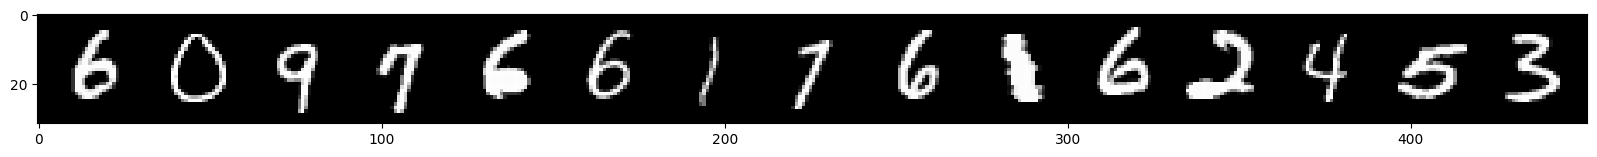

In [17]:
# Random pick a sample to plot
sample = next(iter(train_loader))
imgs, lbls = sample
# Plot the sample
plt.figure(figsize=(20,20))
grid = torchvision.utils.make_grid(nrow=16, tensor=imgs[:15])
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray');
print('Labels: {}'.format(lbls[:15]))

## **Convolutional Neural Network**

### **Tensor shapes after different layers**

Output size = [(W - K + 2 * P) / S] + 1

W is the input size

K is the kernel size

P is the padding

S is the stride

Specifically,

Output height = (Input height + padding height top + padding height bottom - kernel height) / (stride height) + 1

Output width = (Output width + padding width right + padding width left - kernel width) / (stride width) + 1

In [18]:
target = torch.zeros(1, 30, 30)
cov_layer = nn.Conv2d(1,20,5,1)
# after 1 convolutional layer
target = cov_layer(target)
print(target.shape)
# after 1 max pooling layer
target = F.max_pool2d(target,2,2)
print(target.shape)
# another convolutional layer
target = nn.Conv2d(20, 50, 5, 1)(target)
print(target.shape)
# another max pooling layer
target = F.max_pool2d(target,2,2)
print(target.shape)

torch.Size([20, 26, 26])
torch.Size([20, 13, 13])
torch.Size([50, 9, 9])
torch.Size([50, 4, 4])


### **Define model (15pts)**

In [123]:
# Feel free to change the training parameters here.
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    # (10 pts)TODO: define 2 convolutional layers and 2 FC layers
    self.in_channels = 1
    self.hidden = [20,50,50*4*4,32]
    self.out_channels = 10
    self.conv1 = nn.Conv2d(in_channels=self.in_channels, out_channels=self.hidden[0], kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=self.hidden[0], out_channels=self.hidden[1], kernel_size=5)
    self.fc1 = nn.Linear(in_features=self.hidden[2], out_features=self.hidden[3])
    self.fc2 = nn.Linear(in_features=self.hidden[3], out_features=self.out_channels)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.max_pool2d(x,2,2)
    x=F.relu(self.conv2(x))
    x=F.max_pool2d(x,2,2)
    x=x.view(x.shape[0],-1) # (5pt)TODO: use proper dimension
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return F.log_softmax(x,dim=1)

### **Training (15pts)**

In [119]:
def train(model,device,loader,optimizer,epoch,criterion):
  model.train()
  for i, (data,label) in enumerate(loader):
    data,label=data.to(device),label.to(device)
    pred=model(data)

    loss=criterion(pred,label)

    optimizer.zero_grad() # (5pt)TODO: Zero out gradients of optimizer
    loss.backward() # (5pt)TODO: Loss backward
    optimizer.step() # (5pt)TODO: Gradient descent update step for optimizer
    if i == 0:
      print('Epoch: {}, loss:{}'.format(epoch+1,loss.item()))

### **Testing**

In [120]:
def test(model,device,loader):
  model.eval()
  total_loss=0
  correct=0
  for i, (data,label) in enumerate(loader):
    data,label=data.to(device),label.to(device)
    output=model(data)

    pred=output.argmax(dim=1)
    correct+=pred.eq(label.view_as(pred)).sum().item()
  total_loss/=len(loader.dataset)
  acc=correct/len(loader.dataset)
  print('Test accuracy: {}%'.format(acc*100))

### **Hyper-parameters and optimizer (10pts)**

In [124]:
# Feel free to change the training parameters here.
nums_epoch=20 # Every 10 epochs may require an additional 2 minutes of training.
lr=1e-4 # learning rate
momentum=0.9

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN().to(device)
optimizer=optim.SGD(model.parameters(), lr=lr, momentum=momentum) # (5pt)TODO: use SGD optimizer
criterion=nn.NLLLoss(reduction='mean', size_average=None) # (5pt)TODO: Use negative log likelihood as loss criterion

### **Start Training!**

The above default setting will garuntee an accuracy of 90% here and you may try different parameter to see the difference.

In [125]:
for epoch in range(nums_epoch):
  train(model,device,train_loader,optimizer,epoch,criterion)
  test(model,device,test_loader)


Epoch: 1, loss:2.3217976093292236
Test accuracy: 10.27%
Epoch: 2, loss:2.2818212509155273
Test accuracy: 15.290000000000001%
Epoch: 3, loss:2.275848150253296
Test accuracy: 22.95%
Epoch: 4, loss:2.222773551940918
Test accuracy: 29.609999999999996%
Epoch: 5, loss:2.1541714668273926
Test accuracy: 45.89%
Epoch: 6, loss:2.0606026649475098
Test accuracy: 62.23%
Epoch: 7, loss:1.8237825632095337
Test accuracy: 71.21%
Epoch: 8, loss:1.3698883056640625
Test accuracy: 78.01%
Epoch: 9, loss:1.031718134880066
Test accuracy: 82.26%
Epoch: 10, loss:0.7486787438392639
Test accuracy: 84.38%
Epoch: 11, loss:0.6569405794143677
Test accuracy: 85.88%
Epoch: 12, loss:0.5892332196235657
Test accuracy: 87.27000000000001%
Epoch: 13, loss:0.39799928665161133
Test accuracy: 88.24%
Epoch: 14, loss:0.3952799439430237
Test accuracy: 88.59%
Epoch: 15, loss:0.4410941004753113
Test accuracy: 89.13%
Epoch: 16, loss:0.3957124948501587
Test accuracy: 89.46%
Epoch: 17, loss:0.3865669071674347
Test accuracy: 90.22%
Epoc

# **Image classfication with CIFAR10 dataset**

In this section, you are required to build a simple convolutional neural network for image classification, possibly with some advanced training tips.

## **About the Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


## **Now, it's your time!**

In [400]:
# You may define your own transforms to achieve a higher accuracy.

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),  # Randomly crop images with padding
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, saturation, and hue
    transforms.RandomRotation(10),  # Randomly rotate images by up to 10 degrees
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to the range [-1, 1]
])

# Define transforms for test data (no data augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset_CIFAR10 = datasets.CIFAR10(root="dataset/", train=True, transform=transform_train, download=True)
test_dataset_CIFAR10 = datasets.CIFAR10(root="dataset/", train=False, transform=transform_test,download=True)


# Load Data
batch_size_CIFAR10 = 128
train_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR10, batch_size=batch_size_CIFAR10, shuffle=True, num_workers=1, pin_memory=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10, batch_size=batch_size_CIFAR10, shuffle=True, num_workers=1, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


### **Data Visulization**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


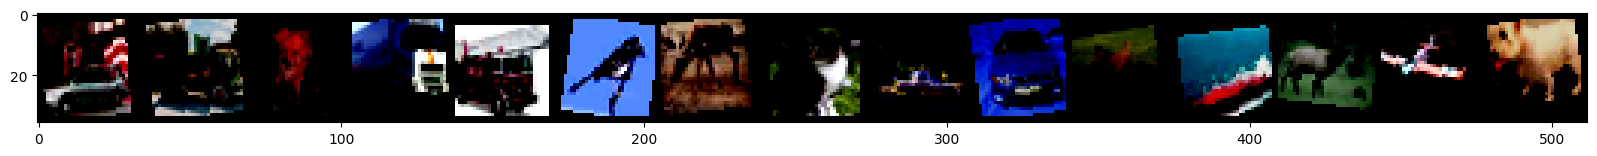

In [401]:
# Random pick a sample to plot
sample = next(iter(train_loader_CIFAR10))
imgs, lbls = sample

# Plot the sample
plt.figure(figsize=(20,20))
grid = torchvision.utils.make_grid(nrow=16, tensor=imgs[:15])
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray');

### **Define model (30pts)**

In [402]:
class CNN_CIFAR10(nn.Module):
    def __init__(self):
        super(CNN_CIFAR10, self).__init__()
        # (30pts) TODO: build a network you like
        self.in_channels = 3
        self.hidden = [256,128,64,32,16,8]
        self.out_channels = 10
        self.conv1 = nn.Conv2d(in_channels=self.in_channels, out_channels=self.hidden[0], kernel_size=5, padding=5)
        self.conv2 = nn.Conv2d(in_channels=self.hidden[0], out_channels=self.hidden[1], kernel_size=5, padding=5)
        self.conv3 = nn.Conv2d(in_channels=self.hidden[1], out_channels=self.hidden[2], kernel_size=5, padding=5)
        self.conv4 = nn.Conv2d(in_channels=self.hidden[2], out_channels=self.hidden[3], kernel_size=5, padding=5)
        self.conv5 = nn.Conv2d(in_channels=self.hidden[3], out_channels=self.hidden[4], kernel_size=5, padding=0)
        self.fc1 = nn.Linear(in_features=self.hidden[4], out_features=self.hidden[5])
        self.fc2 = nn.Linear(in_features=self.hidden[5], out_features=self.out_channels)

    def forward(self,x):
#         x = self.network(x)
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv3(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv4(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv5(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return F.log_softmax(x,dim=1)

        


### **Hyper-parameters and optimizer (25pts)**

In [403]:
nums_epoch =  100 #(5pt)TODO
lr =  0.01 #(5pt)TODO
momentum =  0.75 #(5pt)TODO
device = torch.device("cuda")
model = CNN_CIFAR10().to(device)
criterion =  nn.CrossEntropyLoss() #(5pt)TODO
optimizer_CIFAR10 =  optim.SGD(model.parameters(), lr=lr, momentum=momentum) #(5pt)TODO

### **Training (5pts)**

In [404]:
def train_CIFAR10(model,device,loader,optimizer,epoch,criterion):
  #(5pts) TODO: refer to the training process above
    model.train()
    for i, (data,label) in enumerate(loader):
        data,label=data.to(device),label.to(device)
        pred=model(data)
        loss=criterion(pred,label)

        optimizer.zero_grad() # (5pt)TODO: Zero out gradients of optimizer
        loss.backward() # (5pt)TODO: Loss backward
        optimizer.step() # (5pt)TODO: Gradient descent update step for optimizer
        if i == 0:
          print('Epoch: {}, loss:{}'.format(epoch+1,loss.item()))

### **Testing**

In [405]:
def test_CIFAR10(model,device,loader):
  model.eval()
  num_correct=0
  num_total=0
  for i, (data,label) in enumerate(loader):
    data,label=data.to(device),label.to(device)

    output=model(data)

    _, pred = output.max(1)

    num_correct += (pred == label).sum()
    num_total  += len(label)
  print('Accuracy: {}%'.format(num_correct/num_total*100))

### **Start Training and challenge yourself!**

Hint for achieve higher accuracy:
*   Use deeper network (more convolutional layers), but not be too many.
*   Try different hyper-parameters.
*   Utilize different loss function.
*   Continue training until the loss function converges (more epochs).
*   Apply proper transforms.

Congratulations if you achieved 90% accuracy on test dataset and it is super challege.

Note: It is irrelevant if you do not achieve it, as the grade is not based on accuracy. It is just a challenge if you're interested in this task.

In [406]:
for epoch in range(nums_epoch):
  train_CIFAR10(model,device,train_loader_CIFAR10,optimizer_CIFAR10,epoch,criterion)
  test_CIFAR10(model,device,test_loader_CIFAR10)

Epoch: 1, loss:2.3232569694519043
Accuracy: 15.519998550415039%
Epoch: 2, loss:2.2953288555145264
Accuracy: 25.229999542236328%
Epoch: 3, loss:2.0018842220306396
Accuracy: 27.249998092651367%
Epoch: 4, loss:1.7574231624603271
Accuracy: 35.06999969482422%
Epoch: 5, loss:1.7852258682250977
Accuracy: 40.6099967956543%
Epoch: 6, loss:1.72581148147583
Accuracy: 46.04999923706055%
Epoch: 7, loss:1.4741631746292114
Accuracy: 49.499996185302734%
Epoch: 8, loss:1.3835384845733643
Accuracy: 51.31999969482422%
Epoch: 9, loss:1.3516806364059448
Accuracy: 53.9900016784668%
Epoch: 10, loss:1.3198570013046265
Accuracy: 59.63999557495117%
Epoch: 11, loss:1.2103809118270874
Accuracy: 62.19999694824219%
Epoch: 12, loss:1.1360822916030884
Accuracy: 59.52999496459961%
Epoch: 13, loss:1.1919264793395996
Accuracy: 62.279998779296875%
Epoch: 14, loss:0.9038586020469666
Accuracy: 65.02000427246094%
Epoch: 15, loss:1.0910165309906006
Accuracy: 66.9699935913086%
Epoch: 16, loss:0.879299521446228
Accuracy: 69.31